Modèle Dense (Fully Connected Neural Network)

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

In [5]:
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])


c:\Users\thoma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8913 - loss: 0.3503 - val_accuracy: 0.9692 - val_loss: 0.1046
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9674 - loss: 0.1062 - val_accuracy: 0.9769 - val_loss: 0.0774
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9762 - loss: 0.0760 - val_accuracy: 0.9774 - val_loss: 0.0788
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9807 - loss: 0.0616 - val_accuracy: 0.9801 - val_loss: 0.0668
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9837 - loss: 0.0540 - val_accuracy: 0.9798 - val_loss: 0.0750


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nTest accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9765 - loss: 0.0893

Test accuracy: 0.9797999858856201


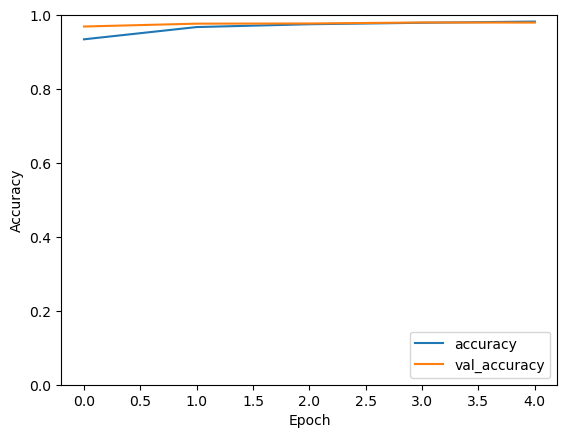

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [10]:
model.save('modele2.h5')